In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd

## Task 1: Reading and Inspection

-  ### Subtask 1.1: Import and read

Import and read the movie database. Store it in a variable called `movies`.

In [3]:
import pandas as pd
movies = pd.read_csv('IMDB_Movies.csv')
a=len(movies)




-  ### Subtask 1.2: Inspect the dataframe

Inspect the dataframe's columns, shapes, variable types etc.

In [4]:
# Write your code for inspection here
movies.shape
movies.columns
movies.dtypes


color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews          object
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

## Task 2: Cleaning the Data

-  ### Subtask 2.1: Inspect Null values

Find out the number of Null values in all the columns and rows. Also, find the percentage of Null values in each column. Round off the percentages upto two decimal places.

In [5]:
# Write your code for column-wise null count here
movies.isnull().sum(axis=0)

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          20
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [6]:
# Write your code for row-wise null count here
movies.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4       13
        ..
5038     4
5039     5
5040     4
5041     2
5042     0
Length: 5043, dtype: int64

In [7]:
# Write your code for column-wise null percentages here
movies.isnull().sum(axis=0)/len(movies)*100

color                         0.376760
director_name                 2.062265
num_critic_for_reviews        0.991473
duration                      0.297442
director_facebook_likes       2.062265
actor_3_facebook_likes        0.456078
actor_2_name                  0.257783
actor_1_facebook_likes        0.138806
gross                        17.529248
genres                        0.000000
actor_1_name                  0.138806
movie_title                   0.000000
num_voted_users               0.000000
cast_total_facebook_likes     0.000000
actor_3_name                  0.456078
facenumber_in_poster          0.257783
plot_keywords                 3.033908
movie_imdb_link               0.000000
num_user_for_reviews          0.396589
language                      0.237954
country                       0.099147
content_rating                6.008328
budget                        9.756098
title_year                    2.141582
actor_2_facebook_likes        0.257783
imdb_score               

-  ### Subtask 2.2: Drop unecessary columns

For this assignment, you will mostly be analyzing the movies with respect to the ratings, gross collection, popularity of movies, etc. So many of the columns in this dataframe are not required. So it is advised to drop the following columns.
-  color
-  director_facebook_likes
-  actor_1_facebook_likes
-  actor_2_facebook_likes
-  actor_3_facebook_likes
-  actor_2_name
-  cast_total_facebook_likes
-  actor_3_name
-  duration
-  facenumber_in_poster
-  content_rating
-  country
-  movie_imdb_link
-  aspect_ratio
-  plot_keywords

In [8]:

movies.drop(['color','director_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','actor_2_name','cast_total_facebook_likes','actor_3_name','duration','facenumber_in_poster','content_rating','country','movie_imdb_link','aspect_ratio','plot_keywords'],axis=1,inplace=True)


-  ### Subtask 2.3: Drop unecessary rows using columns with high Null percentages

Now, on inspection you might notice that some columns have large percentage (greater than 5%) of Null values. Drop all the rows which have Null values for such columns.

In [9]:
# Write your code for dropping the rows here
b=movies.isnull().sum(axis=0)/len(movies)*100
c=b[b>5]
d=c.index
movies.dropna(subset=d,axis=0,how='any',inplace=True)






-  ### Subtask 2.4: Fill NaN values

You might notice that the `language` column has some NaN values. Here, on inspection, you will see that it is safe to replace all the missing values with `'English'`.

In [10]:
# Write your code for filling the NaN values in the 'language' column here
movies['language'].fillna('English',inplace=True)


-  ### Subtask 2.5: Check the number of retained rows

You might notice that two of the columns viz. `num_critic_for_reviews` and `actor_1_name` have small percentages of NaN values left. You can let these columns as it is for now. Check the number and percentage of the rows retained after completing all the tasks above.

In [11]:
# Write your code for checking number of retained rows here
#no of rows retained
nor=len(movies)
prr=(nor/a)*100
prr



77.15645449137418

**Checkpoint 1:** You might have noticed that we still have around `77%` of the rows!

## Task 3: Data Analysis

-  ### Subtask 3.1: Change the unit of columns

Convert the unit of the `budget` and `gross` columns from `$` to `million $`.

In [12]:
# Write your code for unit conversion here
movies['gross']=movies.gross.apply(lambda x:x/1000000)
movies['budget']=movies.budget.apply(lambda x:x/1000000)


-  ### Subtask 3.2: Find the movies with highest profit

    1. Create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
    2. Sort the dataframe using the `profit` column as reference.
    3. Plot `profit` (y-axis) vs `budget` (x- axis) and observe the outliers using the appropriate chart type.
    4. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`

In [13]:
# Write your code for creating the profit column here
movies['profit']=movies['gross']-movies['budget']


In [14]:
# Write your code for sorting the dataframe here
movies.sort_values(by=['profit'],inplace=True,ascending=False)

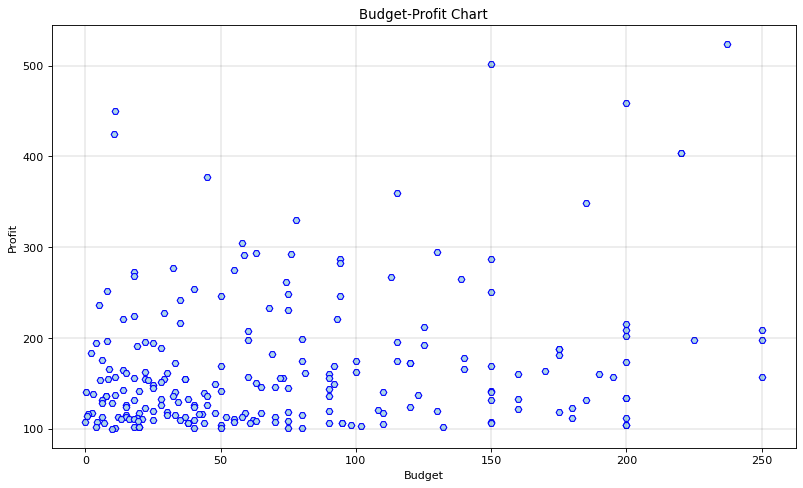

In [15]:
# Write code for profit vs budget plot here
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(num=None, figsize=(12,7), dpi=80)   
movies=movies[movies.profit>100]
plt.scatter(movies['budget'], movies['profit'],marker ="H",edgecolors = 'b',facecolor='lightblue') 
plt.xlabel("Budget") 
plt.ylabel("Profit") 
plt.title("Budget-Profit Chart")
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
plt.show()

In [16]:
top10 = pd.DataFrame(movies.iloc[0:10,[0,5]])
top10

,director_name,movie_title
0,James Cameron,Avatar
29,Colin Trevorrow,Jurassic World
26,James Cameron,Titanic
3024,George Lucas,Star Wars: Episode IV - A New Hope
3080,Steven Spielberg,E.T. the Extra-Terrestrial
794,Joss Whedon,The Avengers
17,Joss Whedon,The Avengers
509,Roger Allers,The Lion King
240,George Lucas,Star Wars: Episode I - The Phantom Menace
66,Christopher Nolan,The Dark Knight


-  ### Subtask 3.3: Drop duplicate values

After you found out the top 10 profiting movies, you might have noticed a duplicate value. So, it seems like the dataframe has duplicate values as well. Drop the duplicate values from the dataframe and repeat `Subtask 3.2`. Note that the same `movie_title` can be there in different languages. 

In [17]:
# Write your code for dropping duplicate values here
movies.drop_duplicates(inplace=True)


In [18]:
# Write code for repeating subtask 2 here
#code for creating the profit column here
movies['profit']=movies['gross']-movies['budget']
#code for sorting the dataframe here
movies.sort_values(by=['profit'],inplace=True,ascending=False)
top10 = pd.DataFrame(movies.iloc[0:10,[0,5]])
top10

,director_name,movie_title
0,James Cameron,Avatar
29,Colin Trevorrow,Jurassic World
26,James Cameron,Titanic
3024,George Lucas,Star Wars: Episode IV - A New Hope
3080,Steven Spielberg,E.T. the Extra-Terrestrial
794,Joss Whedon,The Avengers
509,Roger Allers,The Lion King
240,George Lucas,Star Wars: Episode I - The Phantom Menace
66,Christopher Nolan,The Dark Knight
439,Gary Ross,The Hunger Games


**Checkpoint 2:** You might spot two movies directed by `James Cameron` in the list.

-  ### Subtask 3.4: Find IMDb Top 250

    1. Create a new dataframe `IMDb_Top_250` and store the top 250 movies with the highest IMDb Rating (corresponding to the column: `imdb_score`). Also make sure that for all of these movies, the `num_voted_users` is greater than 25,000.
Also add a `Rank` column containing the values 1 to 250 indicating the ranks of the corresponding films.
    2. Extract all the movies in the `IMDb_Top_250` dataframe which are not in the English language and store them in a new dataframe named `Top_Foreign_Lang_Film`.

In [19]:
# Write your code for extracting the top 250 movies as per the IMDb score here. Make sure that you store it in a new dataframe 
# and name that dataframe as 'IMDb_Top_250'
movies = pd.read_csv('IMDB_Movies.csv')
dm=pd.DataFrame(movies.loc[movies.num_voted_users > 25000,:])
dm.sort_values(by='imdb_score',inplace=True,ascending=False)
IMDb_Top_250=pd.DataFrame(dm.iloc[0:250,:])
IMDb_Top_250['Rank']=IMDb_Top_250.imdb_score.rank(method='first',ascending=False)
IMDb_Top_250.iloc[0:250,[11,25]]



,movie_title,imdb_score
1937,The Shawshank Redemption,9.3
3466,The Godfather,9.2
3481,Fargo,9.0
66,The Dark Knight,9.0
2837,The Godfather: Part II,9.0
...,...,...
4266,Before Sunset,8.0
602,Big Fish,8.0
1603,Mystic River,8.0
4261,The Hustler,8.0


In [20]:
Top_Foreign_Lang_Film =pd.DataFrame(IMDb_Top_250.loc[IMDb_Top_250.language != 'English',:])
Top_Foreign_Lang_Film.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Rank
4498,Color,Sergio Leone,181.0,142.0,0.0,24.0,Luigi Pistilli,16000.0,6100000.0,Western,...,Italian,Italy,Approved,1200000.0,1966.0,34.0,8.9,2.35,20000,6.0
4747,Black and White,Akira Kurosawa,153.0,202.0,0.0,4.0,Minoru Chiaki,304.0,269061.0,Action|Adventure|Drama,...,Japanese,Japan,Unrated,2000000.0,1954.0,8.0,8.7,1.37,11000,23.0
4029,Color,Fernando Meirelles,214.0,135.0,353.0,40.0,Seu Jorge,1000.0,7563397.0,Crime|Drama,...,Portuguese,Brazil,R,3300000.0,2002.0,69.0,8.7,1.85,28000,25.0
2373,Color,Hayao Miyazaki,246.0,125.0,6000.0,7.0,Ryûnosuke Kamiki,17.0,10049886.0,Adventure|Animation|Family|Fantasy,...,Japanese,Japan,PG,19000000.0,2001.0,10.0,8.6,1.85,28000,27.0
3870,Color,Raja Menon,39.0,130.0,6.0,12.0,Sameer Ali Khan,85.0,NaN,Action|Drama|History|Thriller|War,...,Hindi,India,NaN,4400000.0,2016.0,26.0,8.5,2.35,10000,42.0


**Checkpoint 3:** Can you spot `Veer-Zaara` in the dataframe?

- ### Subtask 3.5: Find the best directors

    1. Group the dataframe using the `director_name` column.
    2. Find out the top 10 directors for whom the mean of `imdb_score` is the highest and store them in a new dataframe `top10director`.  Incase of a tie in IMDb score between two directors, sort them alphabetically. 

In [21]:
# Write your code for extracting the top 10 directors here
movies = pd.read_csv('IMDB_Movies.csv')
pd.set_option('display.max_rows',None)
top10director=pd.DataFrame(movies.groupby(by='director_name')['imdb_score'].mean())
top10director.sort_values(['imdb_score','director_name'],ascending=(False,True),inplace=True)
top10director.head(10)






,imdb_score
director_name,
John Blanchard,9.5
Cary Bell,8.7
Mitchell Altieri,8.7
Sadyk Sher-Niyaz,8.7
Charles Chaplin,8.6
Mike Mayhall,8.6
Damien Chazelle,8.5
Majid Majidi,8.5
Raja Menon,8.5


**Checkpoint 4:** No surprises that `Damien Chazelle` (director of Whiplash and La La Land) is in this list.

-  ### Subtask 3.6: Find popular genres

You might have noticed the `genres` column in the dataframe with all the genres of the movies seperated by a pipe (`|`). Out of all the movie genres, the first two are most significant for any film.

1. Extract the first two genres from the `genres` column and store them in two new columns: `genre_1` and `genre_2`. Some of the movies might have only one genre. In such cases, extract the single genre into both the columns, i.e. for such movies the `genre_2` will be the same as `genre_1`.
2. Group the dataframe using `genre_1` as the primary column and `genre_2` as the secondary column.
3. Find out the 5 most popular combo of genres by finding the mean of the gross values using the `gross` column and store them in a new dataframe named `PopGenre`.

In [22]:
# Write your code for extracting the first two genres of each movie here
movies = pd.read_csv('IMDB_Movies.csv')
movies['genres']=movies.genres.str.split('|')
movies['genre_1']=movies.genres.apply(lambda x:x[0])
movies['genre_2']=movies.genres.apply(lambda x:x[1] if len(x)>1 else x[0])

In [23]:
movies_by_segment = movies.groupby(['genre_1','genre_2'])

In [24]:
PopGenre=pd.DataFrame(movies_by_segment.gross.mean())
PopGenre.sort_values('gross',ascending=False,inplace=True)
PopGenre

gross
genre_1     genre_2                  
Family      Sci-Fi       4.349495e+08
Adventure   Sci-Fi       2.286278e+08
            Animation    1.170500e+08
            Family       1.132994e+08
Action      Adventure    1.095400e+08
Fantasy     Mystery      1.006149e+08
Animation   Comedy       9.300794e+07
Action      Animation    9.268051e+07
Musical     Romance      9.208400e+07
Adventure   Fantasy      9.061798e+07
Action      Mystery      9.033021e+07
Adventure   Drama        8.886784e+07
Animation   Family       8.626693e+07
Action      War          7.708603e+07
Adventure   Mystery      7.209934e+07
Action      Thriller     7.155367e+07
            Sci-Fi       7.078828e+07
            Romance      6.763116e+07
Adventure   Adventure    6.716329e+07
Comedy      Family       6.685043e+07
Animation   Drama        6.663834e+07
Romance     Sci-Fi       6.245332e+07
Action      Action       5.952091e+07
Crime       Thriller     5.764710e+07
Fantasy     Romance      5.636235e+07
Comedy      Western      5.600364e+07
Action      Drama        5.464217e+07
Adventure   Comedy       5.445431e+07
Comedy      Sport        5.439159e+07
Mystery     Thriller     5.392319e+07
Drama       Western      5.387869e+07
Action      Comedy       5.210209e+07
Comedy      War          5.110805e+07
Drama       Fantasy      4.828101e+07
Mystery     Sci-Fi       4.462515e+07
Comedy      Romance      4.421279e+07
Action      Horror       4.356833e+07
Comedy      Fantasy      4.265048e+07
Action      Crime        4.220000e+07
Drama       Family       4.172282e+07
Action      Biography    4.140538e+07
Comedy      Comedy       4.032428e+07
Horror      Horror       3.925634e+07
            Mystery      3.917709e+07
Crime       Mystery      3.851066e+07
Fantasy     Horror       3.723191e+07
Drama       Sport        3.703823e+07
            Sci-Fi       3.685255e+07
Action      Fantasy      3.682229e+07
Biography   Drama        3.675466e+07
Crime       Romance      3.476772e+07
Biography   Crime        3.442904e+07
Documentary Drama        3.421873e+07
Drama       Musical      3.414216e+07
Comedy      Music        3.308676e+07
Drama       Mystery      3.165144e+07
Biography   Comedy       3.161883e+07
Comedy      Sci-Fi       3.076796e+07
Drama       History      3.034309e+07
Sci-Fi      Thriller     2.979379e+07
Drama       Horror       2.971115e+07
            Music        2.951368e+07
Comedy      Drama        2.869897e+07
Crime       Drama        2.863621e+07
Drama       Romance      2.813572e+07
Comedy      Crime        2.799024e+07
Drama       War          2.789001e+07
Adventure   Horror       2.667696e+07
Horror      Thriller     2.667462e+07
            Sci-Fi       2.626269e+07
Crime       Fantasy      2.575384e+07
Drama       Thriller     2.333703e+07
Documentary Music        2.323229e+07
Action      Family       2.205995e+07
Comedy      Mystery      2.184931e+07
Adventure   Biography    1.954257e+07
            Crime        1.796004e+07
Comedy      Documentary  1.749131e+07
Drama       Drama        1.641386e+07
Mystery     Romance      1.595753e+07
Action      Western      1.326499e+07
Crime       Horror       1.324050e+07
Fantasy     Fantasy      1.249586e+07
Comedy      Musical      1.224109e+07
Western     Western      1.199322e+07
Comedy      Horror       1.188780e+07
Family      Music        1.041198e+07
Documentary Family       8.044906e+06
Action      Sport        7.009668e+06
Crime       Documentary  6.736857e+06
Documentary Documentary  5.752294e+06
            Sport        4.347541e+06
Adventure   Documentary  4.035004e+06
Music       Music        3.419967e+06
Documentary History      3.391951e+06
Animation   Biography    3.363340e+06
Biography   Documentary  3.271229e+06
Family      Fantasy      2.119994e+06
Documentary War          1.919369e+06
Fantasy     Thriller     1.487477e+06
Comedy      History      6.342770e+05
Thriller    Thriller     5.409697e+05
Musical     Musical      5.318060e+05
Horror      Musical      1.402440e+05
Roma

**Checkpoint 5:** Well, as it turns out. `Family + Sci-Fi` is the most popular combo of genres out there!

-  ### Subtask 3.7: Find the critic-favorite and audience-favorite actors

    1. Create three new dataframes namely, `Meryl_Streep`, `Leo_Caprio`, and `Brad_Pitt` which contain the movies in which the actors: 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' are the lead actors. Use only the `actor_1_name` column for extraction. Also, make sure that you use the names 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' for the said extraction.
    2. Append the rows of all these dataframes and store them in a new dataframe named `Combined`.
    3. Group the combined dataframe using the `actor_1_name` column.
    4. Find the mean of the `num_critic_for_reviews` and `num_users_for_review` and identify the actors which have the highest mean.
    5. Observe the change in number of voted users over decades using a bar chart. Create a column called `decade` which represents the decade to which every movie belongs to. For example, the  `title_year`  year 1923, 1925 should be stored as 1920s. Sort the dataframe based on the column `decade`, group it by `decade` and find the sum of users voted in each decade. Store this in a new data frame called `df_by_decade`.

In [25]:
movies = pd.read_csv('IMDB_Movies.csv')
movies['num_user_for_reviews']=movies.num_user_for_reviews.str.replace(' ','0')
movies['num_user_for_reviews']=movies.num_user_for_reviews.apply(float)

Meryl_Streep=movies.loc[movies.actor_1_name=='Meryl Streep',:]


In [26]:
Leo_Caprio=movies.loc[movies.actor_1_name=='Leonardo DiCaprio',:]


In [27]:
Brad_Pitt=movies.loc[movies.actor_1_name=='Brad Pitt',:]

In [28]:
# Write your code for combining the three dataframes here
combined=pd.concat([Meryl_Streep,Leo_Caprio,Brad_Pitt])

In [29]:
# Write your code for grouping the combined dataframe here
ca=combined.groupby('actor_1_name')


In [30]:
# Write the code for finding the mean of critic reviews and audience reviews here
cr=ca['num_critic_for_reviews'].mean().sort_values(ascending=False)
ur=ca['num_user_for_reviews'].mean().sort_values(ascending=False)
cr,ur

(actor_1_name
 Leonardo DiCaprio    330.190476
 Brad Pitt            231.944444
 Meryl Streep         163.153846
 Name: num_critic_for_reviews, dtype: float64,
 actor_1_name
 Leonardo DiCaprio    914.476190
 Brad Pitt            702.444444
 Meryl Streep         257.307692
 Name: num_user_for_reviews, dtype: float64)

**Checkpoint 6:** `Leonardo` has aced both the lists!

In [31]:
# Write the code for calculating decade here
movies['decade']=movies['title_year'].apply(lambda x:(x//10)*10)

In [32]:
# Write your code for creating the data frame df_by_decade here 
movies.set_index('decade',inplace=True)
df_by_decade=pd.DataFrame(movies.groupby(movies.index)['num_voted_users'].sum().sort_values(ascending=False))

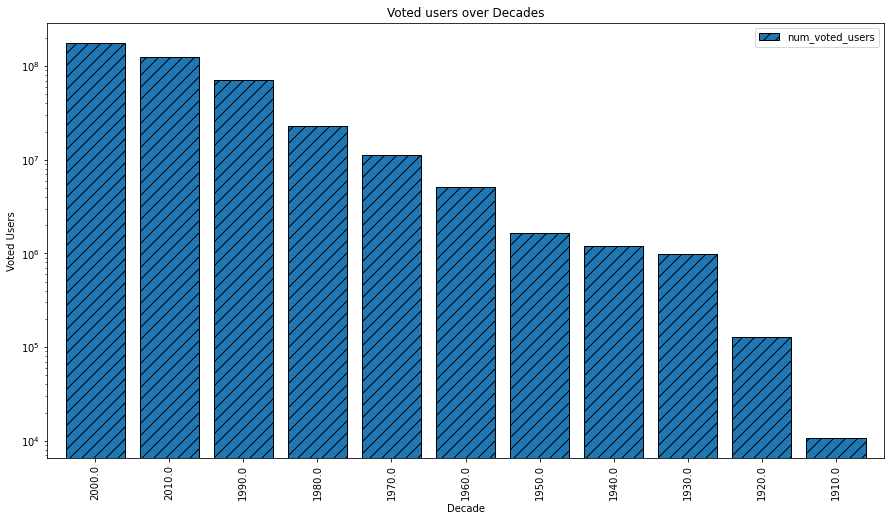

In [33]:
# Write your code for plotting number of voted users vs decade
import matplotlib.pyplot as plt

df_by_decade.plot.bar(figsize=(15,8),width=0.8,hatch="//",edgecolor='k')   
plt.xlabel("Decade")
plt.ylabel("Voted Users")
plt.title("Voted users over Decades")
plt.yscale('log') 
plt.show()